In [1]:
import sys
sys.path.append("../src")
import preprocessing
import cconfig
import clustering

# Plotting defaults
%matplotlib inline
import matplotlib.pyplot as plt



# Load data and preprocess

In [2]:
# load original data in dataframes, sample, select some features and scale
df,df_Normal,df_Attack=preprocessing.data_load(0.01,None ,False)
X=preprocessing.data_scale(df[cconfig.SELECTED_FEATURES_FLOW])
X_Normal=preprocessing.data_scale(df_Normal[cconfig.SELECTED_FEATURES_FLOW])
X_Attack=preprocessing.data_scale(df_Attack[cconfig.SELECTED_FEATURES_FLOW])

# KMEANS

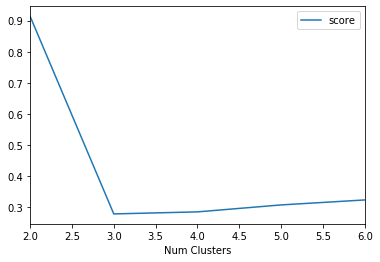

In [3]:
# find the best number of clusters
df_silhouette = clustering.kmeans_get_number_clusters(X_Normal)

# select best number of clusters for kmeans
num_clusters=df_silhouette.iloc[df_silhouette.score.idxmax() ]['Num Clusters']

# plot the result for reference
df_silhouette.plot(x='Num Clusters', y='score')

Variability explained by the PC: 0.6448008476225978

Cluster 0: 803 data points
done.


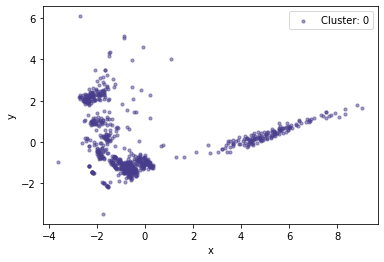

In [5]:
# fit kmeans model with normal day data
kmeans=clustering.kmeans_train(X_Normal,int(num_clusters))

# predictions with attack dataset
labels=clustering.kmeans_predict(X_Attack,kmeans)

# dimensionality reduction
XR=preprocessing.get_pc(X_Attack,2)

# print results
clustering.clustering_print_results(df_Attack,labels,cconfig.SELECTED_FEATURES_FLOW,XR,True,True,'kmeans')

# DBSCAN

In [ ]:
# define hyper parameters for dbscan
eps=0.5
min_samples=26

# fit and predict
dblabels=clustering.dbscan_fit_predict(eps,min_samples,X)

# do dimensionality reduction to plot
XR=preprocessing.get_pc(X,2)

# print and plot
clustering.clustering_print_results(df,dblabels,cconfig.SELECTED_FEATURES_FLOW,XR,True,True,'dbscan')

# OPTIC

In [ ]:
# define hyper params for optics
eps=0.5
min_samples=26

# predict using optics
labels=clustering.optics_fit_predict(X,min_samples,'dbscan', eps)

# do dimensionality reduction to plot
XR=preprocessing.get_pc(X,2)

# print and plot
clustering.clustering_print_results(df,labels,cconfig.SELECTED_FEATURES_FLOW,XR,True,True,'optic')

# IFOREST

In [ ]:
# model iforest
iforest=clustering.iforest_train(X_Normal)
labels=clustering.iforest_predict(X_Attack,iforest)

# dimensionality reduction
XR=preprocessing.get_pc(X_Attack,2)

# print results
clustering.clustering_print_results(df_Attack,labels,cconfig.SELECTED_FEATURES_FLOW,XR,True,True,'iforest')